In [1]:
library("poweRlaw")

In [2]:
library('RODBC')
channel<-odbcConnect('data')

In [3]:
sql<-"SELECT COUNT(url) AS intensity FROM [data].[dbo].[health_records] GROUP BY userid, date ORDER BY userid, date"

In [4]:
data<-sqlQuery(channel, query = sql)

In [5]:
m_intensity = conpl$new(data$intensity)

In [6]:
est = estimate_xmin(m_intensity)

In [7]:
est

$gof
[1] 0.02646711

$xmin
[1] 215

$pars
[1] 2.665562

$ntail
[1] 223

$distance
[1] "ks"

attr(,"class")
[1] "estimate_xmin"

In [8]:
m_intensity$setXmin(est)

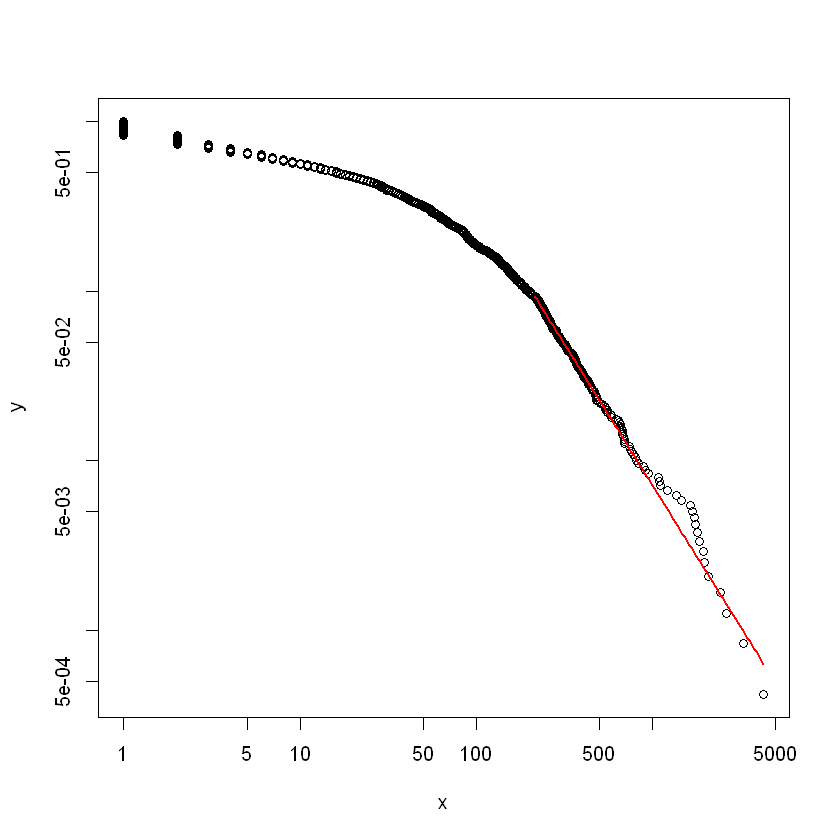

In [9]:
plot(m_intensity)
lines(m_intensity,col=2,lwd=2)

In [10]:
bs_p = bootstrap_p(m_intensity,no_of_sims=200, threads=4, seed=1)

Expected total run time for 200 sims, using 4 threads is 117 seconds.


In [11]:
bs_p$p

[1] 0.925

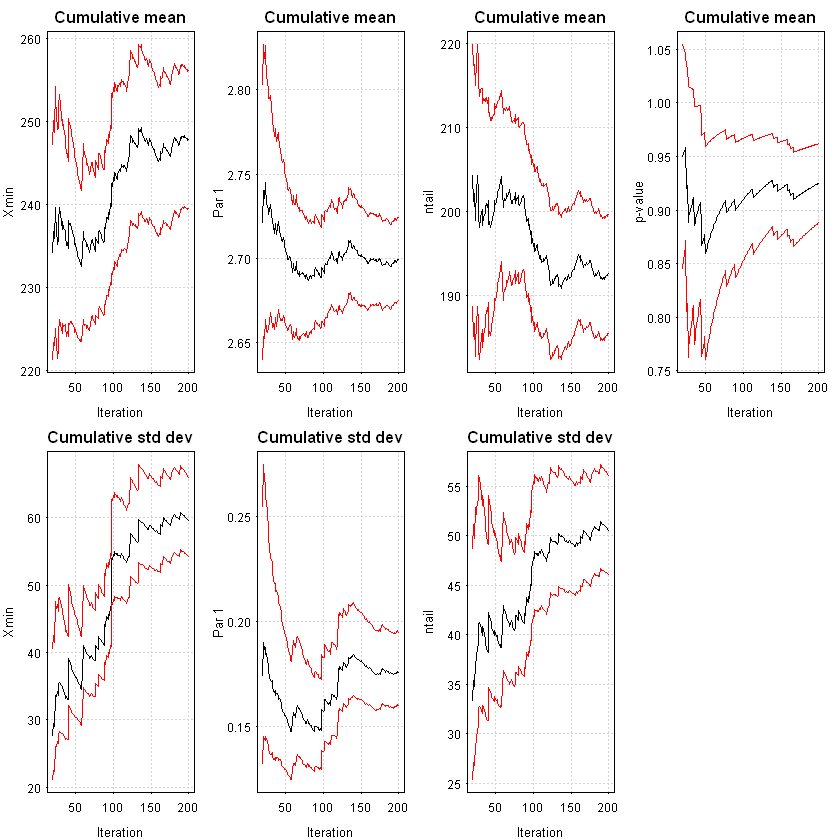

In [12]:
plot(bs_p)